In [3]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import RYGate

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import vector2latex
import qiskit.quantum_info as qi
from qiskit.circuit.library import CSwapGate

<IPython.core.display.Latex object>

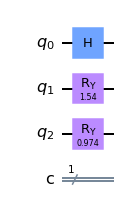

<IPython.core.display.Latex object>

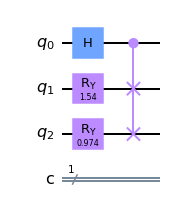

Statevector([ 0.63465534+0.j,  0.        +0.j,  0.47552826+0.j,
              0.13949555+0.j,  0.47552826+0.j, -0.13949555+0.j,
              0.32563835+0.j,  0.        +0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

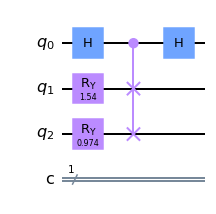

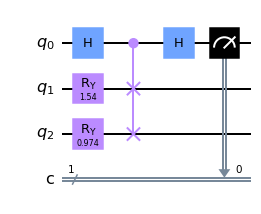

In [4]:
c = QuantumCircuit(3,1)
gate1 = RYGate(0.49 * math.pi)
gate2 = RYGate(0.31 * math.pi)
c.h(0)
c.append(gate1, [1])
c.append(gate2, [2])

stv1 = qi.Statevector.from_instruction(c)
display(stv1.draw('latex'))
display(c.draw("mpl"))

c.append(CSwapGate(), [0, 1, 2])

stv2 = qi.Statevector.from_instruction(c)
display(stv2.draw('latex'))
display(c.draw("mpl"))


c.h(0)

stv3 = qi.Statevector.from_instruction(c)
print(stv3)
display(stv3.draw('latex'))
display(c.draw("mpl"))

c.measure(0, 0)
display(c.draw("mpl"))



In [5]:
def run_experiment(circuit):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=50000).result()
    counts = results.get_counts()
    display(plot_histogram(counts))
    return counts

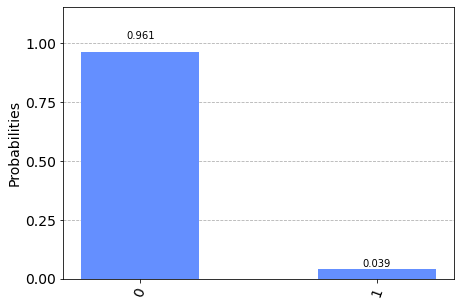

{'1': 1951, '0': 48049}


In [6]:
counts = run_experiment(c)
print(counts)

In [7]:
math.sqrt(1 - (0.038*2))

0.9612491872558333

<IPython.core.display.Latex object>

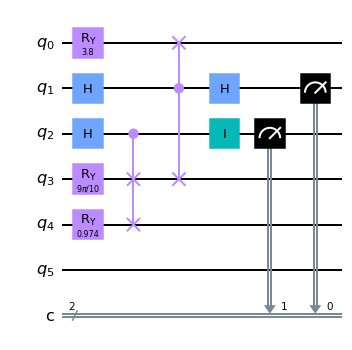

In [8]:
c = QuantumCircuit(6,2)
gatePHI = RYGate(1.21 * math.pi)
gate1 = RYGate(0.9 * math.pi)
gate2 = RYGate(0.31 * math.pi)
c.append(gatePHI, [0])
c.h([1, 2])
c.append(gate1, [3])
c.append(gate2, [4])

c.append(CSwapGate(), [2, 3, 4])
c.append(CSwapGate(), [1, 0, 3])
c.h(1)
c.i(2)

stv1 = qi.Statevector.from_instruction(c)

# c.x(5)
# c.h(5)
# c.h(1)
# c.h(2)
# c.x(1)
# c.x(2)
# c.ccx(1, 2, 5)
# c.x(1)
# c.x(2)
# c.h(1)
# c.h(2)

c.measure(1, 0)
c.measure(2, 1)

display(stv1.draw('latex'))
display(c.draw("mpl"))

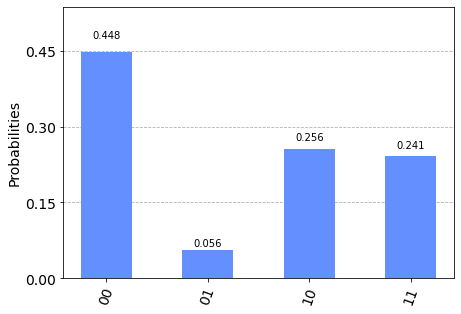

{'01': 2781, '10': 12777, '11': 12061, '00': 22381}
01 0.8825827941458949 11 0.16978456245714435


In [9]:
counts = run_experiment(c)
print(counts)
q3_count = counts['00'] + counts['01']
q4_count = counts['10'] + counts['11']
p3, p4 = counts['01'] / q3_count, counts['11'] / q4_count
res3, res4 = (math.sqrt(1 -  2 * p3), math.sqrt(1 -  2 * p4))
print("01", res3, "11" ,res4)

In [10]:
def get_answer(gate):
    x4 = QuantumCircuit(1)
    x4.append(gate, [0])
    stv1 = qi.Statevector.from_instruction(x4)
    return (stv1[0], stv1[1])

In [11]:
real = get_answer(gatePHI)
ans3 = get_answer(gate1)
ans4 = get_answer(gate2)

In [12]:
def run_experiment_with_shots(circuit, shots, draw = True):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=shots).result()
    counts = results.get_counts()
    if draw:
        display(plot_histogram(counts))
    return counts

In [13]:
def postproces_counts(counts):
    q3_count = counts['00'] + counts['01']
    q4_count = counts['10'] + counts['11']
    p3, p4 = counts['01'] / q3_count, counts['11'] / q4_count
    res3, res4 = (math.sqrt(1 -  2 * p3), math.sqrt(1 -  2 * p4))
    return {3: res3, 4: res4}

In [14]:
def evaluate(result, product3, product4):
    res3 =  (abs(result[3] - product3))/(result[3])
    res4 =  (abs(result[4] - product4))/(result[4])
    return {3: res3, 4: res4}

In [15]:
def get_curcuit(gatePHI, gate1, gate2):
    c = QuantumCircuit(6,2)
    c.append(gatePHI, [0])
    c.h([1, 2])
    c.append(gate1, [3])
    c.append(gate2, [4])

    c.append(CSwapGate(), [2, 3, 4])
    c.append(CSwapGate(), [1, 0, 3])
    c.h(1)
    c.i(2)

    stv1 = qi.Statevector.from_instruction(c)

    # c.x(5)
    # c.h(5)
    # c.h(1)
    # c.h(2)
    # c.x(1)
    # c.x(2)
    # c.ccx(1, 2, 5)
    # c.x(1)
    # c.x(2)
    # c.h(1)
    # c.h(2)

    c.measure(1, 0)
    c.measure(2, 1)

    display(c.draw("mpl"))
    return c

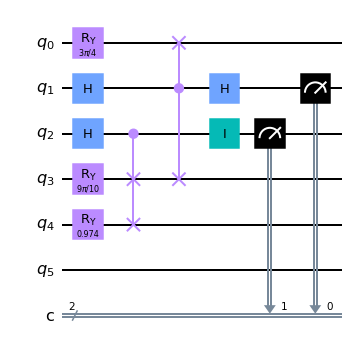

{3: 0.0012803099403512375, 4: 0.001551793190826721}


In [16]:
gatePHI = RYGate(0.75 * math.pi)
gate1 = RYGate(0.9 * math.pi)
gate2 = RYGate(0.31 * math.pi)
gate3 = RYGate(0.10 * math.pi)
gate4 = RYGate(1.5 * math.pi)

real = get_answer(gatePHI)
ans3 = get_answer(gate1)
ans4 = get_answer(gate2)

product3 = real[0] * ans3[0] + real[1] * ans3[1] 
product4 = real[0] * ans4[0] + real[1] * ans4[1]

qc = get_curcuit(gatePHI, gate1, gate2)
counts = run_experiment_with_shots(qc, 10000, draw = False)
result = postproces_counts(counts)
final  = evaluate(result, product3, product4)
print(final)


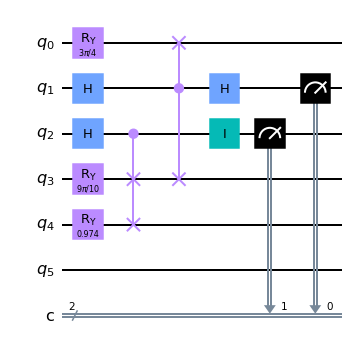

{1024: 0.01167332305254474, 2048: 0.006368046536010515, 4096: 0.005250956677428411, 8192: 0.0010590471308118566, 16384: 0.0006100232410469008} {1024: 0.0021191748695096077, 2048: 0.010257819160351823, 4096: 0.00893024471993455, 8192: 0.00502760573424943, 16384: 0.00043877443529696683}


In [17]:
qc = get_curcuit(gatePHI, gate1, gate2)
a, b = {}, {}
for shots in [1024, 2048, 4096, 8192, 2*8192]:
    counts = run_experiment_with_shots(qc, shots, draw = False)
    result = postproces_counts(counts)
    final  = evaluate(result, product3, product4)
    a[shots], b[shots] = final[3], final[4]
print(a, b)

In [18]:
a

{1024: 0.01167332305254474,
 2048: 0.006368046536010515,
 4096: 0.005250956677428411,
 8192: 0.0010590471308118566,
 16384: 0.0006100232410469008}

In [19]:
b

{1024: 0.0021191748695096077,
 2048: 0.010257819160351823,
 4096: 0.00893024471993455,
 8192: 0.00502760573424943,
 16384: 0.00043877443529696683}

# Testing with 4 gates

In [20]:
def get_curcuit4(gatePHI, gates):
    c = QuantumCircuit(9,4)
    c.h([0, 1, 2, 3])
    c.append(gatePHI, [4])
    for i, g in enumerate(gates):
        c.append(g, [i + 5])
        
    c.append(CSwapGate(), [3, 5, 6])
    c.append(CSwapGate(), [2, 7, 8])
    c.append(CSwapGate(), [1, 5, 7])
    c.append(CSwapGate(), [0, 4, 5])
    
    c.h(0)
    stv1 = qi.Statevector.from_instruction(c)

    for i in range(4):
        c.measure(i, i)
    

    display(c.draw("mpl"))
    return c

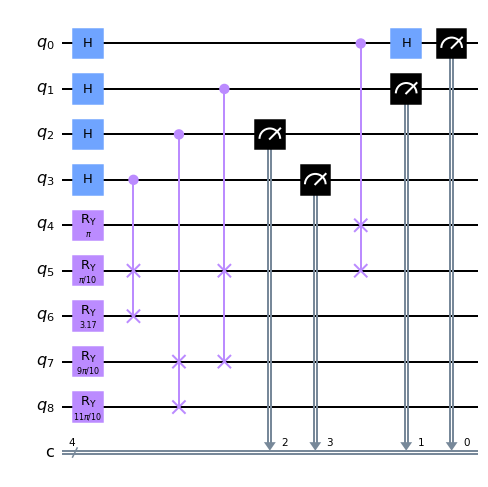

In [21]:
gatePHI = RYGate(1 * math.pi)
gate1 = RYGate(0.10 * math.pi)
gate2 = RYGate(1.01 * math.pi)
gate3 = RYGate(0.90 * math.pi)
gate4 = RYGate(1.10 * math.pi)
gates = [gate1, gate2, gate3, gate4]
qc4 = get_curcuit4(gatePHI, gates)

In [22]:
def run_experiment_with_shots(circuit, shots, draw = True):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=shots).result()
    counts = results.get_counts()
    if draw:
        display(plot_histogram(counts))
    return counts

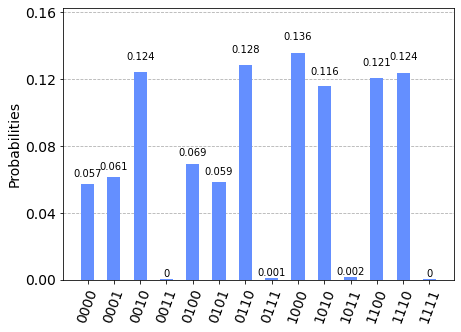

In [23]:
counts = run_experiment_with_shots(qc4, 5000, True)

In [26]:
# order {q3, q2, q1}
state_to_key = {'000': 5, '001': 7, '010': 5, '011':8, '100':6, '101': 7, '110': 6, '111': 8}

def process_counts(counts):
    res = {}
    for k in counts.keys():
        gate_index, v, value = state_to_key[k[:3]], k[3], counts[k]
        if gate_index in res:
            d = res[gate_index]
            if v in d:
                d[v] += value
            else:
                d[v] = value
        else:
            res[gate_index] = {v: value}

    experiment_results = {}
    for k in sorted(res.keys()):
        d = res[k]
        if '1' in d:
            p = d['1']/(d['1'] + d['0'])
        else:
            p = 0
        experiment_results[k] = p
        print(f"Probability of 1 in gate {k} is {p}")
    
    return experiment_results

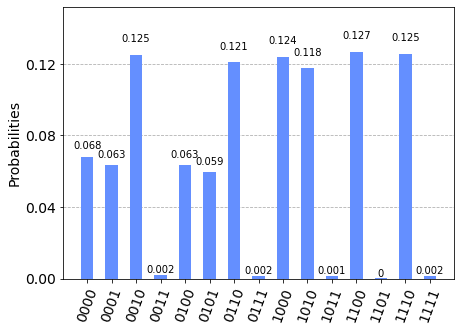

Probability of 1 in gate 5 is 0.4830708661417323
Probability of 1 in gate 6 is 0.0003992015968063872
Probability of 1 in gate 7 is 0.013420089467263115
Probability of 1 in gate 8 is 0.013221153846153846


In [27]:
counts = run_experiment_with_shots(qc4, 10000, True)
experiment_results = process_counts(counts)

In [28]:
def get_answer(gate):
    x4 = QuantumCircuit(1)
    x4.append(gate, [0])
    stv1 = qi.Statevector.from_instruction(x4)
    return (stv1[0], stv1[1])

In [29]:
x, y = get_answer(gatePHI)
answers = {}
for i, g in enumerate(gates):
    ans = get_answer(g)
    dp = ans[0] * x + ans[1] * y
    p = 0.5 * (1 - dp * dp)
    answers[i + 5] = np.real(p)
    print(f"Real answer for gate {i + 5} is {p}")

Real answer for gate 5 is (0.4877641290737884+0j)
Real answer for gate 6 is (0.0001233599085671+0j)
Real answer for gate 7 is (0.01223587092621159+0j)
Real answer for gate 8 is (0.0122358709262117+0j)


In [30]:
print("What algorithm returns")
print({k: v for k, v in experiment_results.items()})
print("What is the real answer")
print(answers)

What algorithm returns
{5: 0.4830708661417323, 6: 0.0003992015968063872, 7: 0.013420089467263115, 8: 0.013221153846153846}
What is the real answer
{5: 0.4877641290737884, 6: 0.0001233599085671, 7: 0.01223587092621159, 8: 0.0122358709262117}


In [31]:
y_test = {k: 1 - v for k, v in experiment_results.items()}
s = 0
for i in range(5, 9):
    s += abs(y_test[i] - answers[i])

print(s)

2.977529458113265


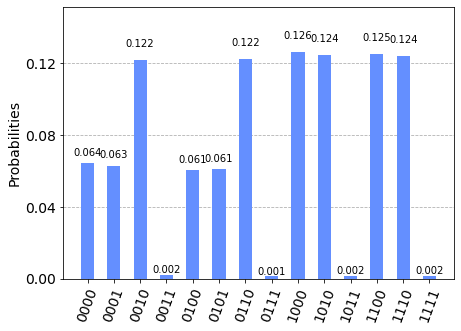

Probability of 1 in gate 5 is 0.4983935742971888
Probability of 1 in gate 6 is 0
Probability of 1 in gate 7 is 0.0144
Probability of 1 in gate 8 is 0.011618589743589744
2.963228605124443


In [32]:
counts = run_experiment_with_shots(qc4, 10000, True)
experiment_results = process_counts(counts)
x, y = get_answer(gatePHI)
answers = {}
for i, g in enumerate(gates):
    ans = get_answer(g)
    dp = ans[0] * x + ans[1] * y
    p = 0.5 * (1 - dp * dp)
    answers[i + 5] = np.real(p)
    
y_test = {k: 1 - v for k, v in experiment_results.items()}
s = 0
for i in range(5, 9):
    s += abs(y_test[i] - answers[i])

print(s)

In [33]:
print(counts)

{'1111': 16, '0111': 13, '1011': 17, '0101': 611, '1010': 1245, '1110': 1243, '0100': 606, '1100': 1252, '1000': 1262, '0000': 643, '0010': 1219, '0011': 19, '0001': 630, '0110': 1224}


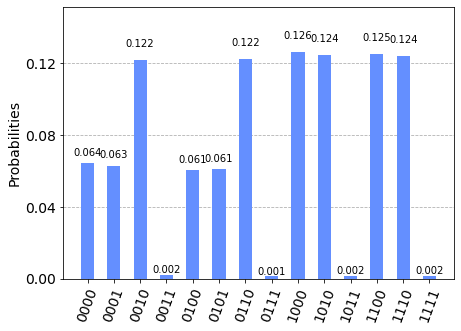

In [34]:
plot_histogram(counts)

In [35]:
def f(k):
    gate_index, v, value = state_to_key[k[:3]], k[3], counts[k]
    return (gate_index, v, k)

s = sorted(list(map(f, counts.keys())))

res = {}
for i, _, k in s:
    gate_index, v, value = state_to_key[k[:3]], k[3], counts[k]
    print(gate_index, k,  v, value)
    if gate_index in res:
        d = res[gate_index]
        if v in d:
            d[v] += value
        else:
            d[v] = value
    else:
        res[gate_index] = {v: value}

print(res)

5 0000 0 643
5 0100 0 606
5 0001 1 630
5 0101 1 611
6 1000 0 1262
6 1100 0 1252
7 0010 0 1219
7 1010 0 1245
7 0011 1 19
7 1011 1 17
8 0110 0 1224
8 1110 0 1243
8 0111 1 13
8 1111 1 16
{5: {'0': 1249, '1': 1241}, 6: {'0': 2514}, 7: {'0': 2464, '1': 36}, 8: {'0': 2467, '1': 29}}


# Completely new algorithm with indexing


In [74]:
def new_c(testing_gate, trained_gates):
    qc = QuantumCircuit(3 + 2 + 4 + 4, 2 + 1)
    qc.h([0, 3, 4])
    qc.append(testing_gate, [1])
    
    for i in range(4):
        qc.append(gates[i], [9 + i])
    qc.barrier()
    
    qc.barrier()
    qc.ccx(3, 4, 8)
#     qc.barrier()
    qc.ccx(3, 4, 6)
    qc.cx(3, 6)
#     qc.barrier()
    qc.ccx(3, 4, 7)
    qc.cx(4, 7)
#     qc.barrier()
    qc.x(3)
    qc.x(4)
    qc.ccx(3, 4, 5)
    qc.x(3)
    qc.x(4)
    qc.barrier()
    

    
    qc.append(CSwapGate(), [5, 2, 9])
    qc.append(CSwapGate(), [6, 2, 10])
    qc.append(CSwapGate(), [7, 2, 11])
    qc.append(CSwapGate(), [8, 2, 12])
    qc.barrier()
    
    qc.barrier()
    qc.append(CSwapGate(), [0, 1, 2])
    qc.h(0)
    
    qc.barrier()
    qc.measure(0, 0)
    qc.measure(3, 1)
    qc.measure(4, 2)
    
    return qc

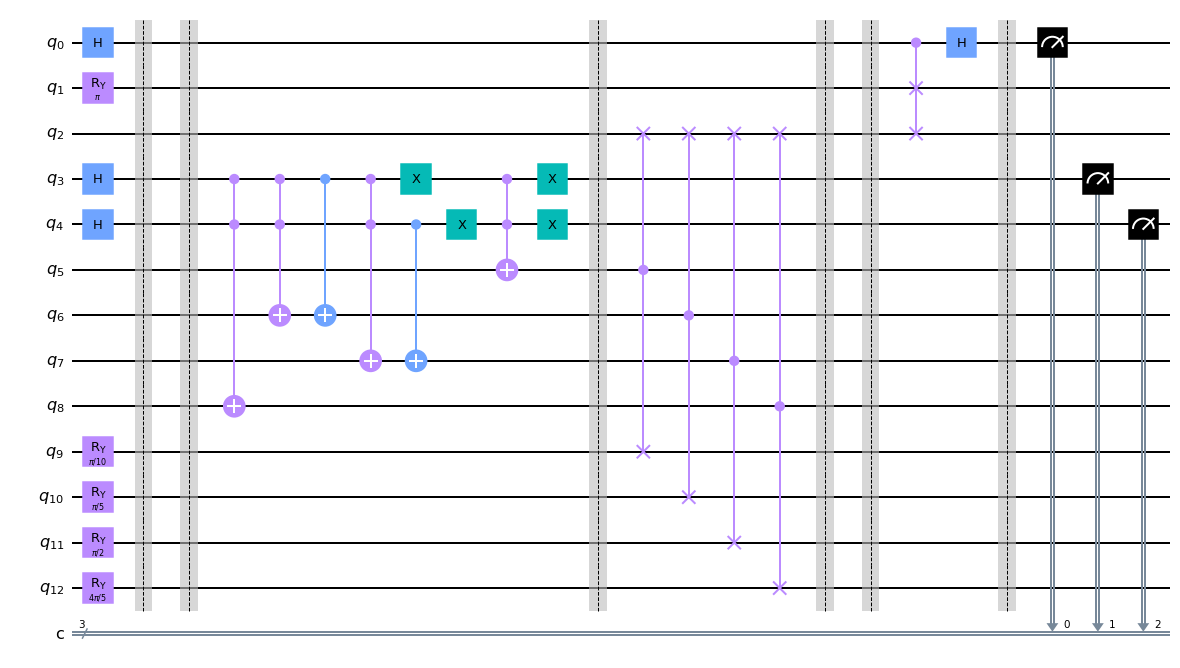

In [75]:
gatePHI = RYGate(1 * math.pi)
gate1 = RYGate(0.10 * math.pi)
gate2 = RYGate(0.20 * math.pi)
gate3 = RYGate(0.50 * math.pi)
gate4 = RYGate(0.80 * math.pi)
gates = [gate1, gate2, gate3, gate4]
qc_new = new_c(gatePHI, gates)

display(qc_new.draw("mpl"))

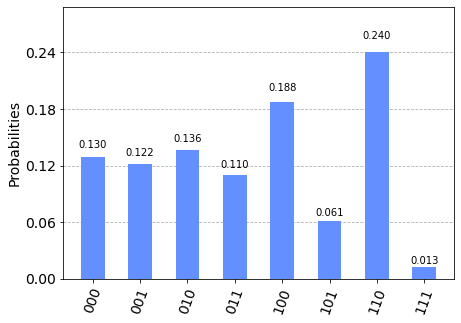

In [38]:
counts = run_experiment_with_shots(qc_new, 50000, True)

In [39]:
state_to_key = {'00': 5, '01': 6, '10': 7, '11': 8}

def process_counts(counts, verbose = False):
    res = {}
    for k in counts.keys():
        gate_index, v, value = state_to_key[k[:2]], k[2], counts[k]
        if gate_index in res:
            d = res[gate_index]
            if v in d:
                d[v] += value
            else:
                d[v] = value
        else:
            res[gate_index] = {v: value}

    experiment_results = {}
    for k in sorted(res.keys()):
        d = res[k]
        p = d['1']/(d['1'] + d['0'])
        experiment_results[k] = p
        if verbose:
            print(f"Probability of 1 in gate {k} is {p}")
    
    return experiment_results


In [40]:
process_counts(counts)

{5: 0.4846196645735633,
 6: 0.44753486863444697,
 7: 0.2468064593878043,
 8: 0.05087025316455696}

Real answer for gate 5 is 0.4877641290737884
Real answer for gate 6 is 0.45225424859373686
Real answer for gate 7 is 0.25000000000000006
Real answer for gate 8 is 0.04774575140626319


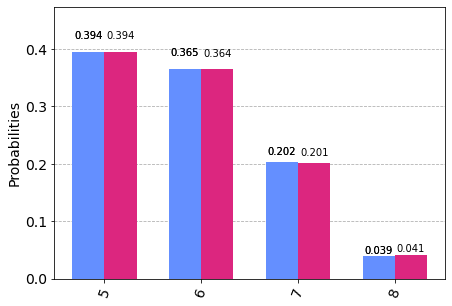

In [41]:
x, y = get_answer(gatePHI)
answers = {}
for i, g in enumerate(gates):
    ans = get_answer(g)
    dp = ans[0] * x + ans[1] * y
    p = 0.5 * (1 - dp * dp)
    answers[i + 5] = np.real(p)
    print(f"Real answer for gate {i + 5} is {answers[i + 5]}")

plot_histogram([answers, process_counts(counts)])

In [42]:
def hist_given_shots(shots, verbose = True):
    counts = run_experiment_with_shots(qc_new, shots, False)
    counts_processed = process_counts(counts)
    x, y = get_answer(gatePHI)
    answers = {}
    error = 0
    for i, g in enumerate(gates):
        ans = get_answer(g)
        dp = ans[0] * x + ans[1] * y
        p = 0.5 * (1 - dp * dp)
        answers[i + 5] = np.real(p)
        error += (counts_processed[i + 5] - answers[i + 5]) ** 2
    mse = error / 4    
    
    if verbose:
        print(f"Running {shots} shots. MSE: {mse}")
        display(plot_histogram([answers, counts_processed]))
    return counts_processed

Running 1024 shots. MSE: 0.0005199237599088437


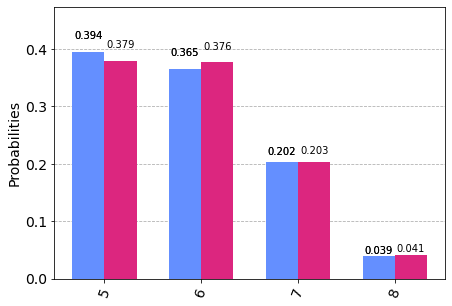

{5: 0.4448669201520912,
 6: 0.44176706827309237,
 7: 0.23863636363636365,
 8: 0.04838709677419355}

In [43]:
hist_given_shots(1024)

Running 2048 shots. MSE: 0.0003071491888831549


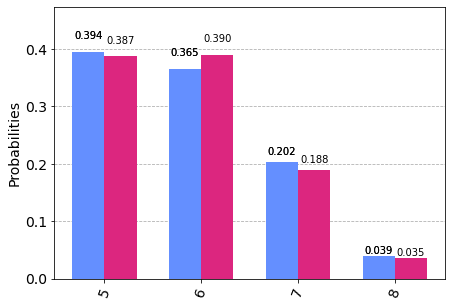

{5: 0.47046843177189407,
 6: 0.47379454926624737,
 7: 0.22893772893772893,
 8: 0.04307116104868914}

In [44]:
hist_given_shots(2048)

Running 4096 shots. MSE: 0.00027994807885040355


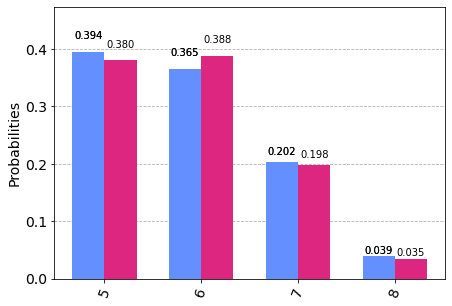

{5: 0.46400778210116733,
 6: 0.4738372093023256,
 7: 0.24203187250996017,
 8: 0.04263565891472868}

In [45]:
hist_given_shots(4096)

Running 50000 shots. MSE: 4.714600479199113e-05


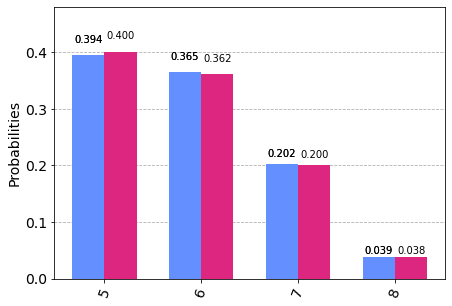

{5: 0.5014222503160556,
 6: 0.4536082474226804,
 7: 0.25042151746286634,
 8: 0.04791531997414351}

In [46]:
hist_given_shots(50000)

In [47]:
original = QuantumCircuit()

In [50]:
def originals(testing_gate, trained_gates):
    res = []
    for g in trained_gates:
        qc = QuantumCircuit(3, 1)
        qc.h(0)
        qc.append(testing_gate, [1])
        qc.append(g, [1])
        qc.append(CSwapGate(), [0, 1, 2])
        qc.h(0)

        qc.measure(0, 0)
        res.append(qc)
    return res

In [51]:
def run_experiment_with_shots(circuit, shots, verbose = True):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=shots).result()
    counts = results.get_counts()
    if verbose:
        display(plot_histogram(counts))
    return counts

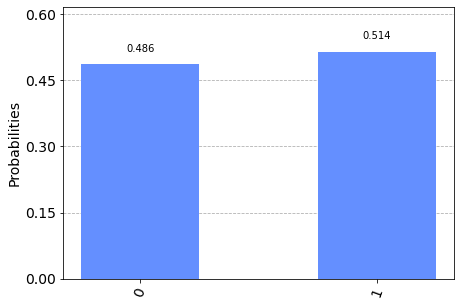

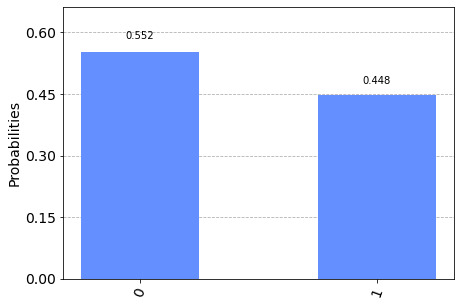

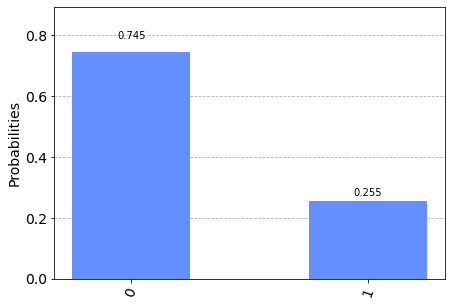

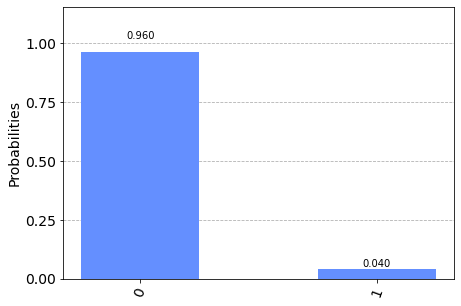

{5: 0.513671875, 6: 0.4482421875, 7: 0.2548828125, 8: 0.0400390625}


In [52]:
res = []
counts_processed_their = {}
qcs = originals(gatePHI, gates)
for (i, qc) in enumerate(qcs):
    shots = 1024
    counts = run_experiment_with_shots(qc, shots)
    counts_processed_their[i + 5] = counts['1'] / shots

print(counts_processed_their)

In [53]:
x, y = get_answer(gatePHI)
answers = {}
error = 0
for i, g in enumerate(gates):
    n = i + 5
    ans = get_answer(g)
    dp = ans[0] * x + ans[1] * y
    p = 0.5 * (1 - dp * dp)
    answers[n] = np.real(p)
    error += (counts_processed_their[n] - answers[n]) ** 2
mse = error / 4  

# The results generation

In [55]:
def get_state(gate):
    x4 = QuantumCircuit(1)
    x4.append(gate, [0])
    stv1 = qi.Statevector.from_instruction(x4)
    return (stv1[0], stv1[1])

def get_target_dictionary(gatePHI, gates):
    x, y = get_state(gatePHI)
    print(x, y)
    target = {}
    error = 0
    for i, g in enumerate(gates):
        n = i + 5
        ans = get_state(g)
        print(i+5, ans)
        dp = ans[0] * x + ans[1] * y
        p = 0.5 * (1 - dp * dp)
        target[n] = np.real(p)
    return target

In [56]:
def get_counts(circuit, shots, verbose = True):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=shots).result()
    counts = results.get_counts()
    if verbose:
        display(plot_histogram(counts))
    return counts

In [57]:
def preprint_curcuits(testing_gate, trained_gates, verbose = False):
    res = []
    for g in trained_gates:
        qc = QuantumCircuit(3, 1)
        qc.h(0)
        qc.append(testing_gate, [1])
        qc.append(g, [2])
        qc.append(CSwapGate(), [0, 1, 2])
        qc.h(0)

        qc.measure(0, 0)
        res.append(qc)
    return res
    
def get_preprint_dictionary(gatePHI, gates, shots = 1024, verbose = False):
    res = {}
    curcuits = preprint_curcuits(gatePHI, gates, verbose)
    for (i, qc) in enumerate(curcuits):
        if verbose:
            display(qc.draw("mpl"))
        counts = run_experiment_with_shots(qc, shots, False)
        if verbose:
            display(plot_histogram(counts))
        if '1' in counts:
            res[i + 5] = counts['1'] / shots
        else:
            res[i + 5] = 0

    return res

In [58]:
def run_experiment_with_shots(circuit, shots, verbose = True):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, aer_sim)
    qobj = assemble(transpiled_circuit)
    results = aer_sim.run(qobj, shots=shots).result()
    counts = results.get_counts()
    if verbose:
        display(plot_histogram(counts))
    return counts

In [59]:
def our_curcuit(testing_gate, trained_gates):
    qc = QuantumCircuit(3 + 2 + 4 + 4, 2 + 1)
    qc.h([0, 3, 4])
    qc.append(testing_gate, [1])
    
    qc.barrier()
    qc.ccx(3, 4, 8)
    qc.barrier()
    qc.ccx(3, 4, 6)
    qc.cx(3, 6)
    qc.barrier()
    qc.ccx(3, 4, 7)
    qc.cx(4, 7)
    qc.barrier()
    qc.x(3)
    qc.x(4)
    qc.ccx(3, 4, 5)
    qc.x(3)
    qc.x(4)
    qc.barrier()
    
    for i in range(4):
        qc.append(gates[i], [9 + i])
    qc.barrier()
    
    qc.append(CSwapGate(), [5, 2, 9])
    qc.append(CSwapGate(), [6, 2, 10])
    qc.append(CSwapGate(), [7, 2, 11])
    qc.append(CSwapGate(), [8, 2, 12])
    qc.barrier()
    
    qc.barrier()
    qc.append(CSwapGate(), [0, 1, 2])
    qc.h(0)
    
    qc.barrier()
    qc.measure(0, 0)
    qc.measure(3, 1)
    qc.measure(4, 2)
    
    return qc

state_to_key = {'00': 5, '01': 6, '10': 7, '11': 8}

def process_counts(counts, verbose = False):
    res = {}
    for k in counts.keys():
        gate_index, v, value = state_to_key[k[:2]], k[2], counts[k]
        if gate_index in res:
            d = res[gate_index]
            if v in d:
                d[v] += value
            else:
                d[v] = value
        else:
            res[gate_index] = {v: value}

    experiment_results = {}
    for k in sorted(res.keys()):
        d = res[k]
        if '1' in d:
            p = d['1']/(d['1'] + d['0'])
        else:
            p = 0
        experiment_results[k] = p
        if verbose:
            print(f"Probability of 1 in gate {k} is {p}")
    
    return experiment_results

def get_our_dictionary(gatePHI, gates, shots=1024):
    curcuit = our_curcuit(gatePHI, gates)
    counts = run_experiment_with_shots(curcuit, shots, False)
    counts_processed = process_counts(counts)
    return counts_processed

In [60]:
def get_error(target, estimation):
    mse = 0
    for k in target.keys():
        mse += abs(estimation[k] - target[k])
    return mse / len(target.keys())

In [61]:
def get_histogram(gatePHI, gates, shots = 1024, verbose = True):
    target = get_target_dictionary(gatePHI, gates)
    preprint = get_preprint_dictionary(gatePHI, gates, shots)
    our = get_our_dictionary(gatePHI, gates, shots)
    preprint_err, our_err = get_error(target, preprint), get_error(target, our)
    if verbose:
        print(f"Abs error for the preprint algorithm: {preprint_err}")
        print(f"Abs error for our algorithm: {our_err}")
        # Define Data

        labels = list(our.keys())
        target_data = list(target.values())
        our_data = list(our.values())
        preprint_data = list(preprint.values())

        x_axis = np.arange(len(labels))

        # Multi bar Chart

        plt.bar(x_axis +0.20, our_data , width=0.2, label = 'Our')
        plt.bar(x_axis +0.20*2, target_data, width=0.2, label = 'Target')
        plt.bar(x_axis +0.20*3, preprint_data, width=0.2, label = 'Preprint')

        # Xticks

        plt.xticks(x_axis+0.20*2,labels)

        # Add legend

        plt.legend()

        # Display

        plt.show()
        #display(plot_histogram([target, our, preprint], figsize=(10, 5), legend=["Target", "Our", "The Preprint"]))
    return preprint_err, our_err

(-0.5594822581021669+0j) (0.828842326904762+0j)
5 ((0.4115143586051089+0j), (0.9114032766354452+0j))
6 ((-0.30901699437494734+0j), (-0.9510565162951536+0j))
7 ((-1+0j), (6.123233995736766e-16+0j))
8 ((-0.48175367410171543+0j), (0.8763066800438635+0j))
Our algorithm's error (0.08442455580959592) is worse by factor of 6.476199114115458 but uses 4 times less shots
(-0.5594822581021669+0j) (0.828842326904762+0j)
5 ((0.4115143586051089+0j), (0.9114032766354452+0j))
6 ((-0.30901699437494734+0j), (-0.9510565162951536+0j))
7 ((-1+0j), (6.123233995736766e-16+0j))
8 ((-0.48175367410171543+0j), (0.8763066800438635+0j))
Our algorithm's error (0.029563643983508317) is worse by factor of 1.660625547616477 but uses 4 times less shots
(-0.5594822581021669+0j) (0.828842326904762+0j)
5 ((0.4115143586051089+0j), (0.9114032766354452+0j))
6 ((-0.30901699437494734+0j), (-0.9510565162951536+0j))
7 ((-1+0j), (6.123233995736766e-16+0j))
8 ((-0.48175367410171543+0j), (0.8763066800438635+0j))
Our algorithm's err

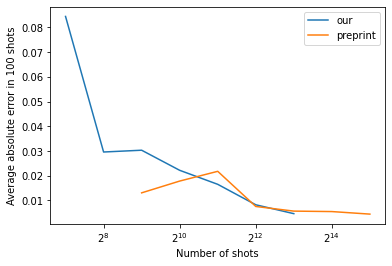

In [73]:
gatePHI = RYGate(1.378 * math.pi)
gate1 = RYGate(0.73 * math.pi)
gate2 = RYGate(-1.2 * math.pi)
gate3 = RYGate(10 * math.pi)
gate4 = RYGate(1.32 * math.pi)
gates = [gate1, gate2, gate3, gate4]


our = {}
preprint = {}
n = 1
for shots in [128, 256, 512, 1024, 2048, 4096, 4096 * 2]:
    preprint_err_total = 0
    our_err_total = 0
    for i in range(n):
        preprint_err, our_err = get_histogram(gatePHI, gates, shots = shots, verbose = False)
        preprint_err_total += preprint_err
        our_err_total += our_err

    p, o = preprint_err_total,  our_err_total
    our[shots], preprint[shots] = our_err_total / n, preprint_err_total / n
    print(f"Our algorithm's error ({our_err_total / n}) is worse by factor of {o / p} but uses 4 times less shots")


o, p = list(our.values()), list(preprint.values())
data = [o, p]
our_keys = list(map(lambda k: 1*k,our.keys()))
preprint_keys = list(map(lambda k: 4*k,our.keys()))
values = list(our.values())

print(our_keys, preprint_keys)

plt.plot(our_keys, o, label='our')
plt.plot(preprint_keys, p, label='preprint')
plt.xscale("log", base = 2)
plt.xlabel("Number of shots")
plt.ylabel(f"Average absolute error in {n * 100} shots")
plt.legend()
plt.show()

In [ ]:
get_histogram(gatePHI, gates, shots = 1024, verbose = True)

In [ ]:
get_histogram(gatePHI, gates, shots = 8092, verbose = True)

In [ ]:
display(get_preprint_dictionary(gatePHI, gates, shots=4096, verbose = True))